In [1]:
import pandas as pd # 데이터 구성 : Series, DataFrame
import matplotlib.pyplot as plt # 데이터 시각화
import matplotlib

from sklearn.model_selection import train_test_split # 데이터 분할 : train, test

from sklearn.ensemble import GradientBoostingClassifier # 분류 gradient boosting 

from sklearn.model_selection import GridSearchCV # 최적 모델, 파라미터 탐색

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# p112 연습

import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [18]:
# p113 연습

# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/SCALE불량.csv", encoding = 'euc-kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1열,1144,116,1133,59,259,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,2열,1144,122,1135,53,238,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1열,1129,116,1121,55,258,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,2열,1152,125,1127,68,266,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1열,1140,134,1128,48,246,TMCP(온도제어),873,8,1조


In [19]:
# p113 연습
# 데이터 전처리 - 결측치 확인 및 처리

# 결측치 확인
df_raw.isnull().sum(axis = 0)

# VALUE는 14개의 결측치, JOB은 81개의 결측치, ... 등을 가짐

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [20]:
# p113 연습

# 데이터 구성하기 - 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  rolling_method   1000 non-null   o

In [21]:
# p113 연습

print("Data 구조:", df_raw.shape) # 데이터 수 체크
print("변수:", df_raw.columns) # 열 체크

Data 구조: (1000, 21)
변수: Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')


In [22]:
df_raw['scale'].value_counts()

양품    690
불량    310
Name: scale, dtype: int64

In [23]:
df_raw['steel_kind'].value_counts()

C    755
T    245
Name: steel_kind, dtype: int64

In [24]:
df_raw['hsb'].value_counts()

적용     953
미적용     47
Name: hsb, dtype: int64

In [27]:
df_raw[(df_raw['hsb']=='미적용') &( df_raw['scale']=='양품')] # hsb 미적용 --> 전부 불량

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group


In [28]:
df_raw['rolling_temp'].value_counts()

993     16
1004    15
956     14
924     13
991     13
        ..
854      1
871      1
868      1
802      1
943      1
Name: rolling_temp, Length: 226, dtype: int64

In [29]:
df_raw['rolling_temp'].describe()

count    1000.000000
mean      934.637000
std        96.598015
min         0.000000
25%       893.750000
50%       948.000000
75%       991.000000
max      1078.000000
Name: rolling_temp, dtype: float64

In [31]:
df_raw[df_raw['rolling_temp']==0]

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group
53,PLT_1054,03JAN2023:16:22:29,양품,GL-E36-TM,독일,T,56,3800,11400,적용,...,2열,1132,95,1128,80,244,TMCP(온도제어),0,6,1조
221,PLT_1222,04JAN2023:19:44:09,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,2열,1163,57,1166,67,228,CR(제어압연),0,10,2조
222,PLT_1223,04JAN2023:19:56:39,양품,JS-SM490YB,일본,C,16,2200,43600,적용,...,1열,1169,64,1164,61,188,CR(제어압연),0,10,2조
598,PLT_1599,07JAN2023:11:40:51,양품,PILAC-BT33,한국,T,81,2100,12900,적용,...,1열,1133,89,1122,59,229,CR(제어압연),0,6,3조
599,PLT_1600,07JAN2023:11:52:00,양품,PILAC-BT33,한국,T,81,2100,13200,적용,...,2열,1130,92,1124,61,210,CR(제어압연),0,6,3조
600,PLT_1601,07JAN2023:11:59:10,양품,NV-D32-TM,영국,T,40,2500,23600,적용,...,1열,1119,109,1117,76,260,TMCP(온도제어),0,6,3조


In [32]:
df_raw['descaling_count'].value_counts()

10    488
8     249
6     206
9      31
7      20
5       6
Name: descaling_count, dtype: int64

- 그래프 기준 양품/불량 차이 많이 날 시 웬만하면 핵심인자
- HSB 적용했는데도 불량 원인 -> 2차 scale?

In [34]:
df_raw.columns

Index(['plate_no', 'rolling_date', 'scale', 'spec_long', 'spec_country',
       'steel_kind', 'pt_thick', 'pt_width', 'pt_length', 'hsb', 'fur_no',
       'fur_input_row', 'fur_heat_temp', 'fur_heat_time', 'fur_soak_temp',
       'fur_soak_time', 'fur_total_time', 'rolling_method', 'rolling_temp',
       'descaling_count', 'work_group'],
      dtype='object')

In [35]:
df_raw['spec_long'].value_counts()

JS-SM490YB     84
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64

In [36]:
df_raw['spec_country'].value_counts()

영국     256
일본     187
미국     159
프랑스    143
한국     132
독일      87
공통      36
Name: spec_country, dtype: int64

In [37]:
df_raw['pt_thick'].value_counts()

20     118
13     118
16      67
18      65
15      62
40      59
12      58
14      51
19      43
17      39
38      31
30      29
22      24
23      19
50      18
25      18
76      15
45      14
66      13
74      13
61      12
21      12
24      11
75       9
70       7
32       6
51       6
81       5
35       5
56       5
26       5
44       5
71       4
64       4
55       4
77       3
34       3
90       3
48       3
60       2
33       2
68       2
83       2
100      2
36       1
27       1
80       1
54       1
Name: pt_thick, dtype: int64

In [38]:
df_raw['pt_width'].value_counts()

2500    143
3100    139
2700     79
2600     72
2200     69
3300     61
2300     58
2900     56
2800     53
3400     51
3600     33
3200     29
3000     25
3500     22
2000     21
2100     18
2400     13
3700     13
1800     11
3800      7
4100      6
1900      5
4300      4
4600      3
4500      3
3900      2
4200      2
4000      1
4400      1
Name: pt_width, dtype: int64

In [39]:
df_raw['pt_length'].value_counts()

30700    22
12000    20
16700    18
41800    17
11000    16
         ..
24900     1
32200     1
31000     1
19000     1
29400     1
Name: pt_length, Length: 278, dtype: int64

In [41]:
df_raw['fur_input_row'].value_counts()

1열    508
2열    492
Name: fur_input_row, dtype: int64

In [42]:
df_raw['fur_no'].value_counts()

3호기    342
1호기    333
2호기    325
Name: fur_no, dtype: int64

In [43]:
df_raw['fur_heat_temp'].value_counts()

1169    37
1171    29
1174    29
1165    25
1158    24
        ..
1200     1
1106     1
1120     1
1109     1
1103     1
Name: fur_heat_temp, Length: 100, dtype: int64

In [44]:
df_raw['fur_soak_temp'].value_counts()

1163    43
1158    35
1164    35
1165    33
1160    32
        ..
1142     3
1184     3
1183     2
1180     2
1113     1
Name: fur_soak_temp, Length: 70, dtype: int64

In [45]:
df_raw['fur_soak_time'].value_counts()

58     44
61     36
73     33
55     32
57     32
       ..
141     1
139     1
37      1
40      1
35      1
Name: fur_soak_time, Length: 100, dtype: int64

In [46]:
df_raw['fur_total_time'].value_counts()

221    23
215    17
194    16
217    16
206    16
       ..
328     1
323     1
336     1
299     1
173     1
Name: fur_total_time, Length: 170, dtype: int64

In [48]:
df_raw['rolling_method'].value_counts()

CR(제어압연)      840
TMCP(온도제어)    160
Name: rolling_method, dtype: int64

In [49]:
df_raw['descaling_count'].value_counts()

10    488
8     249
6     206
9      31
7      20
5       6
Name: descaling_count, dtype: int64

In [50]:
df_raw['work_group'].value_counts()

2조    292
1조    280
3조    218
4조    210
Name: work_group, dtype: int64

<Axes: xlabel='rolling_temp', ylabel='descaling_count'>

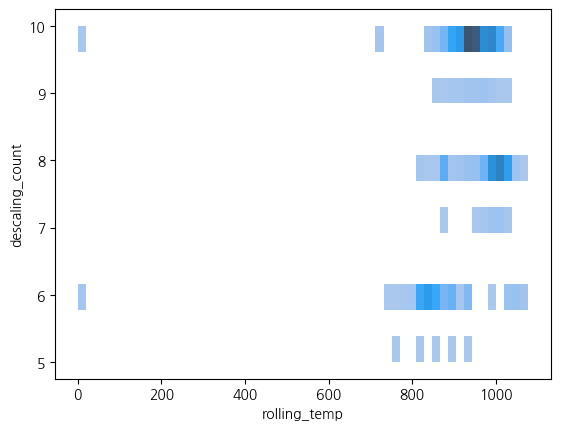

In [64]:
import seaborn as sns
sns.histplot(data=df_raw,x='rolling_temp',y='descaling_count')